# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Mod07 - Tarefa 01.csv',index_col=0)
df.head(5)

,sexo_M,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau_True
0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [5]:
clf = DecisionTreeClassifier(random_state=100)

In [6]:
y = df.mau_True
X = df.drop('mau_True',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
clf = clf.fit(X_train,y_train)

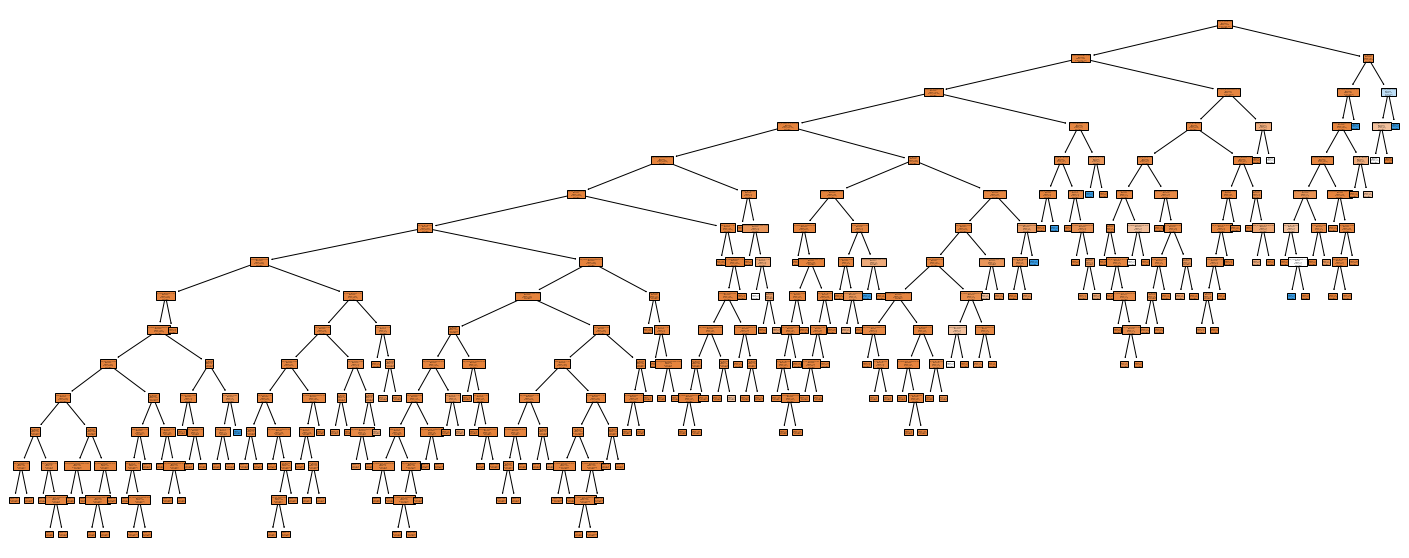

In [8]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mal'],
          feature_names= X_train.columns);

C:\Users\gabrielhxcx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


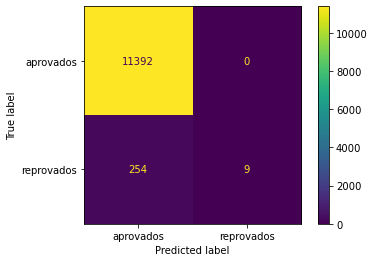

In [9]:
plot_confusion_matrix(clf,X_train,y_train,display_labels=['aprovados', 'reprovados']);

In [10]:
predict = clf.predict(X_train)
accuracy_score(y_train,predict)

0.9782067782067783

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
clf = clf.fit(X_test,y_test)

In [12]:
y_chapeu = clf.predict(X_test)

C:\Users\gabrielhxcx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


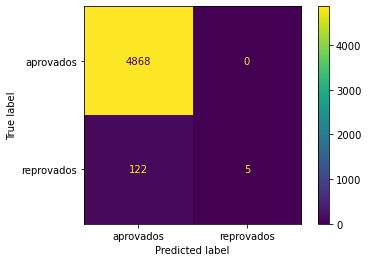

In [13]:
plot_confusion_matrix(clf,
                      X_test,
                      y_test,
                      display_labels=['aprovados', 'reprovados']);


In [14]:
accuracy_score(y_test,y_chapeu)

0.9755755755755756

In [15]:
accuracy_score(y_train,predict)

0.9782067782067783

In [16]:
clf = DecisionTreeClassifier(min_samples_leaf=5,max_depth= 10,random_state=123)

clf = clf.fit(X_test,y_test)


0.9774345774345774

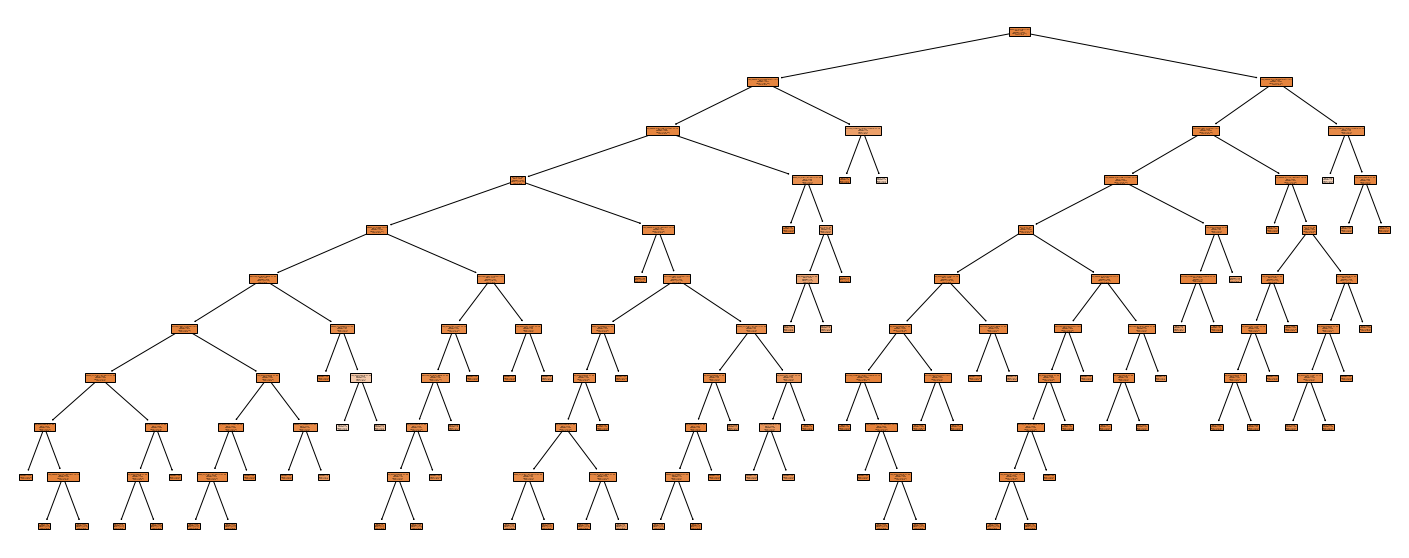

In [17]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names= X_train.columns);

C:\Users\gabrielhxcx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


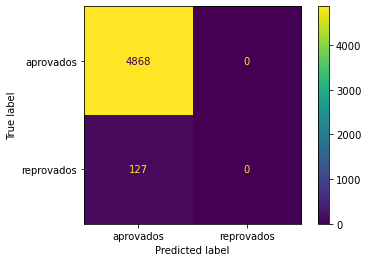

In [18]:
plot_confusion_matrix(clf,X_test,y_test,display_labels=['aprovados', 'reprovados']);

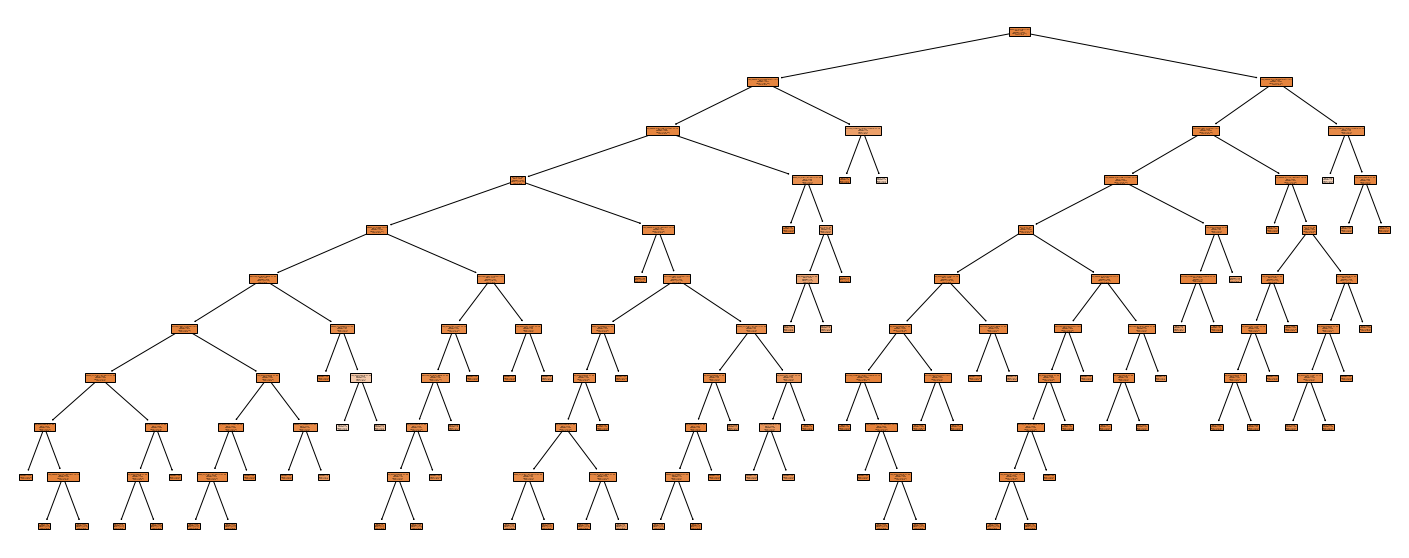

In [19]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Bom'],
          feature_names= X_train.columns);

C:\Users\gabrielhxcx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


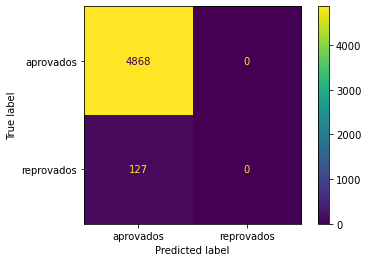

In [21]:
plot_confusion_matrix(clf,X_test,y_test,display_labels=['aprovados', 'reprovados']);

In [26]:
df['mau_True'] = 1

In [32]:
clf = DecisionTreeClassifier(min_samples_leaf=5,max_depth= 10,random_state=123)

y = df.mau_True
X = df.drop('mau_True',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

clf = clf.fit(X_train,y_train)

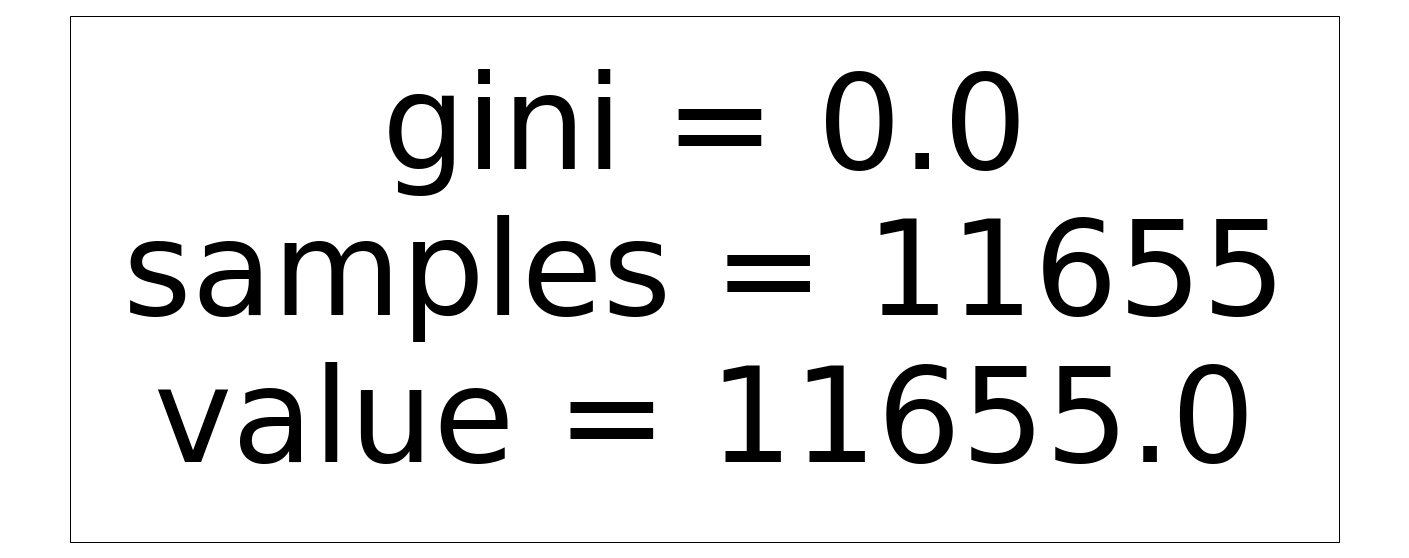

In [34]:
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mal'],
          feature_names= X_train.columns);

In [36]:
predict = clf.predict(X_train)
accuracy_score(y_train,predict)

1.0